# Pre-processing and cleaning data: Predicting House Prices using Machine Learning

## A Case Study of Saudi Arabia

### 1. Importing the Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

### 2. Load the dataset

In [76]:
AQAR_Data = pd.read_csv(r"../../DataSet/aqarItemsData19971.csv")
df = AQAR_Data.copy()

###  3. Drop Features

We have some faetures that we want to drop because they do not add any value to the project like:

- id
- title
- description
- ad_number
- last_update
- views

In [77]:
df.drop(columns=['id','title','description','ad_number','last_update','views'], axis=1, inplace = True)

### Dataframe after droping features:

In [78]:
df.head()

,city,district,front,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimensions,price
0,جدة,حي الروابي,شمالية غربية,4,NaN,3,15م,4,8,1.0,1.0,1.0,103 م²,7م طول - 13م عرض,"420,000 ريال"
1,الدمام,حي الفردوس,جنوبية,3,2.0,3,5م,أرضي,جديد,1.0,1.0,1.0,144 م²,NaN,"610,000 ريال"
2,ابها,حي القريقر,شرقية,2,1.0,2,20م,أول,جديد,1.0,NaN,1.0,340 م²,3م طول - 100م عرض,"960,000 ريال"
3,الدمام,حي النور,جنوبية غربية,5,1.0,3,40م,NaN,جديد,NaN,1.0,1.0,182 م²,10م طول - 18م عرض,"500,000 ريال"
4,الدمام,حي النور,شمالية غربية,5,1.0,3,30م,أرضي,جديد,1.0,NaN,NaN,197 م²,39م طول - 5م عرض,"580,000 ريال"


### 4. Fix missing data 

We have some missing data and we want to fix this data.

All these values will be replaced to 0 or 1 by default. The 1 means that all this data is in the houses, The 0 means that all this data is not in the houses,and it was not mentioned in the AD

In [79]:
df['level'].fillna(value = -1, inplace = True)
df['age'].fillna(value = 0, inplace = True)
df['kitchen'].fillna(value = 1, inplace = True)
df['garage'].fillna(value = 0, inplace = True)
df['elevator'].fillna(value = 0, inplace = True)
df['living_rooms'].fillna(value = 0, inplace = True)
df['bath_rooms'].fillna(value = 1, inplace = True)

### 4.1 fix the `area` feature

In [80]:
df['area'] = df['area'].str.split().str[0]
df['area'] = df['area'].str.replace(',','')
df['area'] = df['area'].str.replace('م²','0')
df['area'] = df['area'].astype('int')
df['area'].unique()

array([ 103,  144,  340,  182,  197,  112,  297,  179,  131,  230,  252,
        472,  194,  175,  100,  166,  135,  180,  280,  105,  200,   97,
        128,  140,  161,  190,  185,  130,  164,  173,  220,  170,  139,
        215,  232,  120,  118,  210,  138,  129,   98,  177,  235,  160,
        186,  163,  300,  147,  221,  400,  142,  266,  370,  188,  145,
        218,  125,  273,  165,  150,  134,  110,  650,  315,  151,  250,
        245,  121,  146,  260,  176,  263,  171,  183,  155,  265,  189,
        225,  240,  109,  251,  159,  133,  270,  132,  202,  174,  330,
        122,  213,  238,  275,  115,  169,  700,  600,  167,  192,  196,
        127,  119,  219,  195,  191,  216,  141,  172,  325,  207,   20,
        148,  113,  227,  223,  153,  241,  310,  162,  136,  312,  158,
        258,   96,   88,  152,   81,  168,  198,  247,  209,  205,  203,
        303,  156,  262,  224,  305,  212,  107,  350,   93,  281,  217,
        450,  178,  380,  289,  199,  114,  204,  1

In [81]:
distrubition = px.histogram(df, x="area")
distrubition
    

### 4.2 fix the `room` feature

In [82]:
df[['rooms']] = df[['rooms']].fillna('0')
df.loc[df['rooms']  == '7+', 'rooms'] = '7'
df['rooms'] = df['rooms'].astype('int')
df['rooms'] = df['rooms'].replace(0 , df['rooms'].mean)
df['rooms'].unique()

array([4, 3, 2, 5, 6, 7, 1,
       <bound method NDFrame._add_numeric_operations.<locals>.mean of 0        4
       1        3
       2        2
       3        5
       4        5
               ..
       19966    4
       19967    5
       19968    4
       19969    4
       19970    4
       Name: rooms, Length: 19971, dtype: int32>                                ],
      dtype=object)

In [83]:
distrubition = px.histogram(df, x="rooms")
distrubition

TypeError: Object of type method is not JSON serializable

TypeError: Object of type method is not JSON serializable

TypeError: Object of type method is not JSON serializable

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'rooms=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([4, 3, 2, ..., 4, 4, 4], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'rooms'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

### 4.3 fix the `front` feature

In [ ]:
df[['front']] = df[['front']].fillna('')
df.loc[df['front'] == 'شمالية', 'front'] = 'North'
df.loc[df['front'] == 'جنوبية', 'front'] = 'South'
df.loc[df['front'] == 'غربية', 'front'] = 'West'
df.loc[df['front'] == 'شرقية', 'front'] = 'ُEast'
df.loc[df['front'] == 'شمالية شرقية', 'front'] = 'North-East'
df.loc[df['front'] == 'شمالية غربية', 'front'] = 'North-West'
df.loc[df['front'] == 'جنوبية شرقية', 'front'] = 'South-East'
df.loc[df['front'] == 'جنوبية غربية', 'front'] = 'South-West'
df.loc[df['front'] == 'ثلاث شوارع', 'front'] = 'Three-Streets'
df.loc[df['front'] == 'أربع شوارع', 'front'] = 'Four-Streets'
df['front'].unique()

array(['North-West', 'South', 'ُEast', 'South-West', 'West', 'North',
       'South-East', 'North-East', 'Three-Streets', 'Four-Streets', ''],
      dtype=object)

In [ ]:
distrubition = px.histogram(df, x="front")
distrubition

### 4.4 fix the `living-room` feature

In [84]:
df['living_rooms'] = df['living_rooms'].astype('int')
# df['living_rooms'] = df['living_rooms'].replace(0 , df['living_rooms'].mean)
df['living_rooms'].unique()

array([0, 2, 1, 3, 5, 4, 6])

In [ ]:
df['living_rooms']

1        2
2        1
3        1
4        1
5        1
        ..
19966    1
19967    1
19968    1
19969    3
19970    1
Name: living_rooms, Length: 19369, dtype: int32

In [ ]:
test_data = df[df['living_rooms'] == 0]
df.drop(df.loc[df['living_rooms'] == 0].index, inplace=True)
x_train = df.drop('living_rooms' , axis=1)
y_train = df['living_rooms']
lr = LinearRegression()
lr.fit(x_train , y_train)
x_test = test_data[df.drop('living_rooms' , axis=1)]

ValueError: could not convert string to float: 'الدمام'

In [ ]:
distrubition = px.histogram(df, x="living_rooms")
distrubition

### 4.5 fix the `bath_rooms` feature

In [ ]:
df.loc[df['bath_rooms']  == '5+', 'bath_rooms'] = '5'
df['bath_rooms'] = df['bath_rooms'].astype('int')
df['bath_rooms'].unique()

array([3, 2, 5, 4, 1])

In [ ]:
distrubition = px.histogram(df, x="bath_rooms")
distrubition

### 4.6 fix the `street_width` feature

In [ ]:
df['street_width'] = df['street_width'].str.replace('م', '')
df[['street_width']] = df[['street_width']].fillna('0')
df['street_width'] = df['street_width'].astype('int')
df['street_width'].unique()

array([ 15,   5,  20,  40,  30, 100,  24,  32,  16,  36,   0,  50,  18,
        25,  21,  23,  33,  12,  35,  26,  22,  52,  10,  19,  57,  34,
        11,  29,  17,  31,  13,   9,  28,  45,  37,  14,  27,  39,  60,
        41,  38,  86,  70,  71,   7,  62,  56,   1,  67,   6,  44,  80,
        82,   4,  87,  81,   8,  65,  58,  51,  61,  53,  55,  54,  59,
        63,  64,  89,  74,  43,  42,  96,  76,  72,  84,  73,  88,   3,
        69,  66,  90,  98])

In [ ]:
distrubition = px.histogram(df, x="street_width")
distrubition

### 4.7 fix the `level` feature

In [ ]:
df.loc[df['level'] == '20+', 'level'] = '20'
df.loc[df['level'] == 'أول', 'level'] = '2'
df.loc[df['level'] == 'أرضي', 'level'] = '1'
df['level'] = df['level'].astype('int')
df['level'].unique()

array([ 4,  1,  2, -1, 16,  3,  5,  6,  7, 13, 20, 11,  8, 18, 17, 12,  9,
       14, 10, 19])

In [ ]:
distrubition = px.histogram(df, x="level")
distrubition

### 4.8 fix the `age` feature

In [ ]:
df.loc[df['age'] == 'جديد', 'age'] = '0'
df.loc[df['age'] == '35+', 'age'] = '35'
df['age'] = df['age'].astype('int')
df['age'].unique()

array([ 8,  0,  1,  9,  7, 12, 15, 11,  2, 10,  6, 14,  5,  3,  4, 25, 30,
       17, 16, 13, 33, 18, 20, 29, 35, 28, 32, 19])

In [ ]:
distrubition = px.histogram(df, x="age")
distrubition

### 4.9 fix the `kitchen` feature

In [ ]:
df['kitchen'] = df['kitchen'].astype('int')
df['kitchen'].unique()

array([1])

In [ ]:
distrubition = px.histogram(df, x="kitchen")
distrubition

### 4.10 fix the `garage` feature

In [ ]:
df['garage'] = df['garage'].astype('int')
df['garage'].unique()

array([1, 0])

In [ ]:
distrubition = px.histogram(df, x="garage")
distrubition

### 4.11 fix the `elevator` feature

In [ ]:
df['elevator'] = df['elevator'].astype('int')
df['elevator'].unique()

array([1, 0])

In [ ]:
distrubition = px.histogram(df, x="elevator")
distrubition

### 4.12 fix the `price` feature

In [ ]:
df['price'].fillna(value = np.nan, inplace = True)
df['price'] = df['price'].str.replace('ريال', '')
df['price'] = df['price'].str.replace('شهري', '')
df['price'] = df['price'].str.replace('سنوي', '')
df['price'] = df['price'].str.replace('/', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip()
df = df[df['price'].notna()]
df['price'] = df['price'].astype('int')
df['price'].unique()

array([  420000,   610000,   960000,   500000,   580000,   335000,
         950000,   680000,   900000,   780000,   850000,  5150000,
         720000,   490000,   360000,   520000,  1020000,  1100000,
         690000,   745000,   499000,   600000,   990000,   751000,
         290000,   550000,   530000,   440000,   450000,   979000,
         800000,   750000,   560000,  1145000,    50000,   670000,
         620000,   350000,   909000,   319000,   700000,   540000,
         545000,   740000,  1450000,   980000,   470000,   570000,
         770000,   930000,  1000000,   485000,  8300000,   400000,
         820000,   430000,  1250000,   410000,   959000,   460000,
         640000,   825000,   940000,  1189000,   650000,   730000,
         535000,   480000,   465000,  9019000,   445000,   615000,
         590000,   675000,   475000,   899000,   710000,   619000,
         760000,   830000,  1400000,   795000,  3800000,   749000,
         951000,   459000,   890000,   660000,   320000,   790

In [ ]:
distrubition = px.histogram(df, x="price")
distrubition

### 4.12 fix the `dimensions` feature

In [ ]:
df['dimensions'] = df['dimensions'].str.findall(r"\d+")
df['dimensions'] = df[['dimensions']].fillna('0') 
df['dimensions']

0         [7, 13]
1               0
2        [3, 100]
3        [10, 18]
4         [39, 5]
           ...   
19966           0
19967    [17, 10]
19968           0
19969     [2, 86]
19970     [21, 8]
Name: dimensions, Length: 19956, dtype: object

### Dataframe after fixing missing data:

In [ ]:
df.isna().sum()

city            0
district        0
front           0
rooms           0
living_rooms    0
bath_rooms      0
street_width    0
level           0
age             0
kitchen         0
garage          0
elevator        0
area            0
dimensions      0
price           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19956 entries, 0 to 19970
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          19956 non-null  object
 1   district      19956 non-null  object
 2   front         19956 non-null  object
 3   rooms         19956 non-null  int32 
 4   living_rooms  19956 non-null  int32 
 5   bath_rooms    19956 non-null  int32 
 6   street_width  19956 non-null  int32 
 7   level         19956 non-null  int32 
 8   age           19956 non-null  int32 
 9   kitchen       19956 non-null  int32 
 10  garage        19956 non-null  int32 
 11  elevator      19956 non-null  int32 
 12  area          19956 non-null  int32 
 13  dimensions    19956 non-null  object
 14  price         19956 non-null  int32 
dtypes: int32(11), object(4)
memory usage: 1.6+ MB


## 5. Removing Outliers

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.

### 5.1 Target Variable "price" Visualization with Outliers boundaries using Standrad Deviation

C:\Users\hasoo\AppData\Local\Temp\ipykernel_22088\2298398314.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



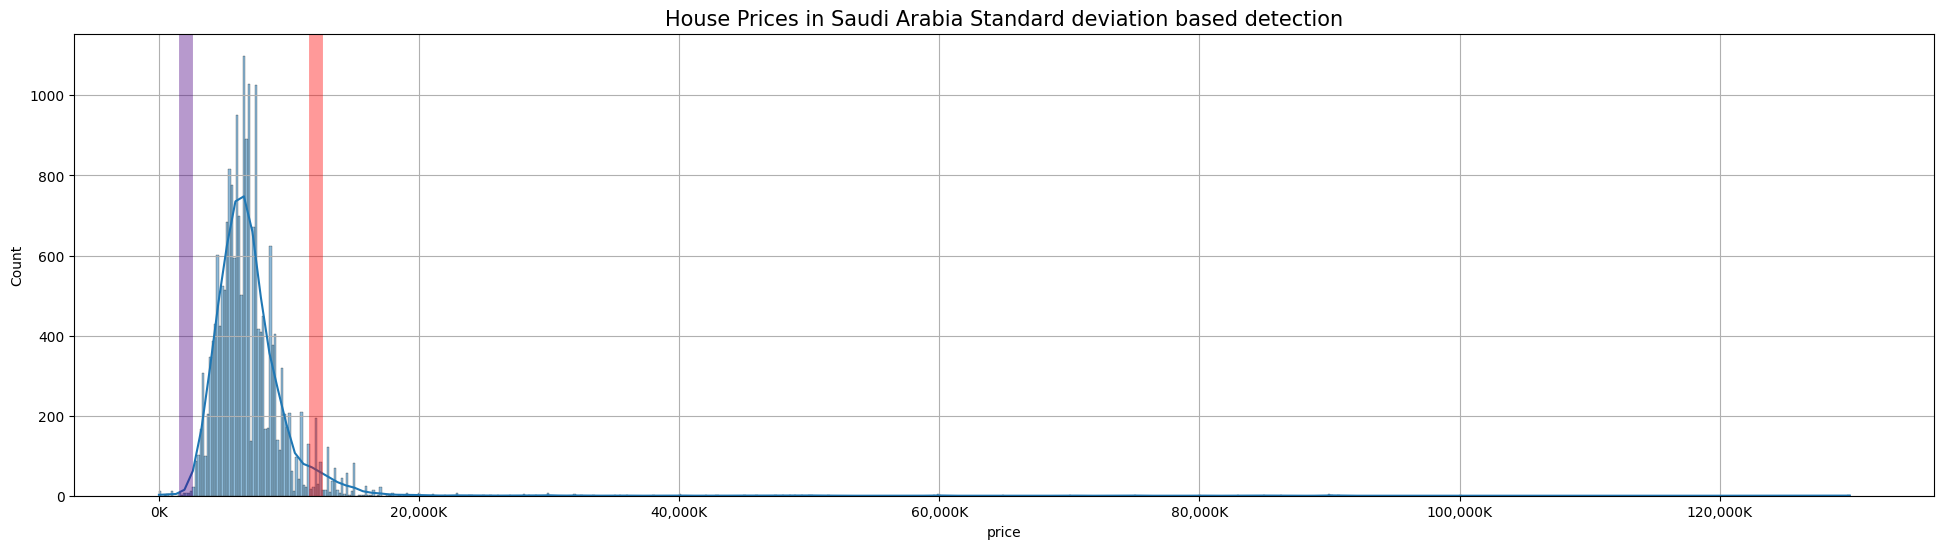

In [ ]:
# Making a histogram of the price variable and adding Standard deviation based detection"
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x= df['price'], kde= True)

# choose 1.2 standard deviation from the mean:
factor = 1.2

# define upper:
upper_lim = df['price'].mean () + df['price'].std () * factor

# define lower:
lower_lim = df['price'].mean () - df['price'].std () * factor

#Plot upper and lower based on 1.2 standard deviation from the mean:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
ax.set_title('House Prices in Saudi Arabia Standard deviation based detection', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/100]
ax.set_xticklabels(xlabels)
plt.grid(True)

### 5.2 Target Variable "price" Visualization with Outliers boundaries using Quantile 

C:\Users\hasoo\AppData\Local\Temp\ipykernel_22088\4150155333.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



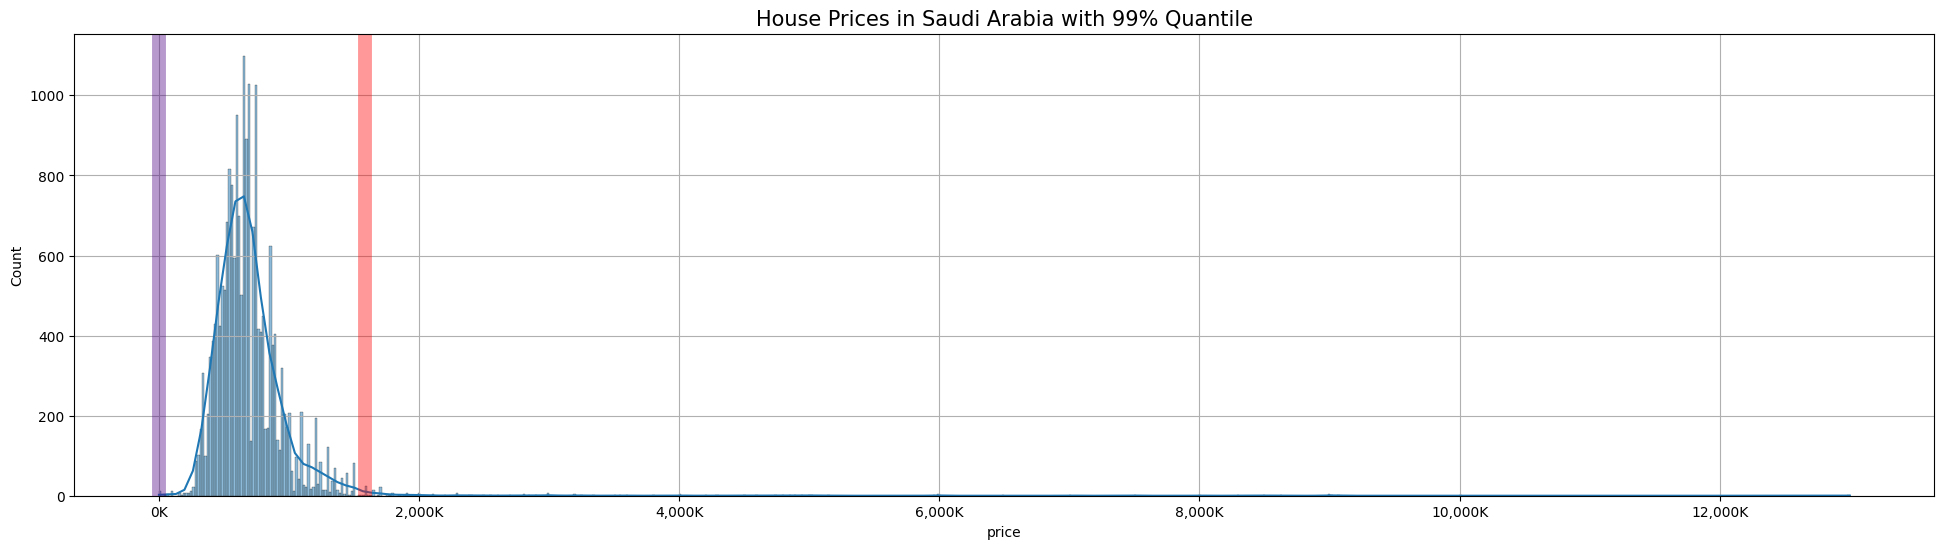

In [ ]:
# Making a histogram of the price variable and Quantile based detection
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
# define upper using 99th quantile:
upper_lim = df['price'].quantile(0.99)
# upper quantile:
lower_lim = df['price'].quantile(0)
#Plot upper and lower based on 0th, 99th quantile:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
ax.set_title('House Prices in Saudi Arabia with 99% Quantile', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

### 5.3 Outliers: Standard deviation based detection

In [ ]:
factor = 1.2
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

df_std = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 5.4 Outliers: Quantile based detection

In [ ]:
upper_lim = df['price'].quantile(0.99)
lower_lim = df['price'].quantile(0.01)

df_quant = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 5.5 Visualization all outliers: Target Variable "price" Visualization

C:\Users\hasoo\AppData\Local\Temp\ipykernel_22088\4035440049.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



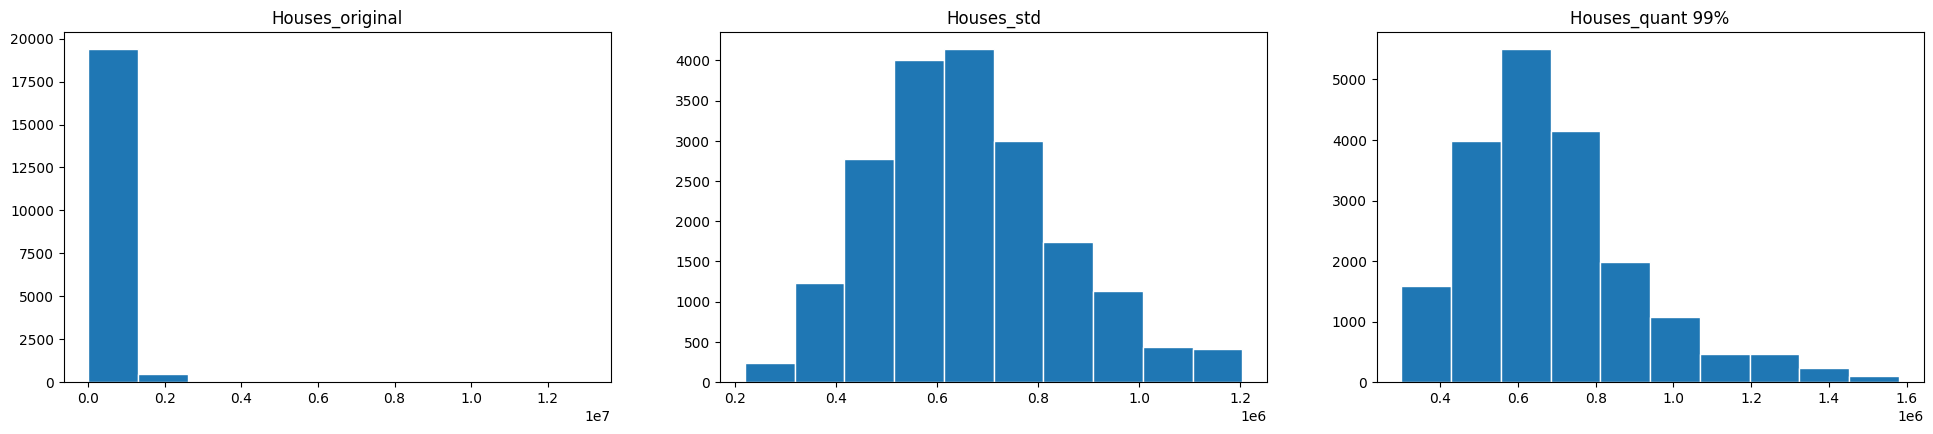

In [ ]:
plt.subplots(figsize = (24,10))
plt.subplot(2,3,1)
plt.hist(df[['price']], edgecolor='white') 
plt.title('Houses_original')
plt.subplot(2,3,2)
plt.hist(df_std[['price']], edgecolor='white')
plt.title('Houses_std')
plt.subplot(2,3,3)
plt.hist(df_quant[['price']], edgecolor='white')
plt.title('Houses_quant 99%')
plt.show()
